In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm

from scipy import stats
from sklearn import datasets
import warnings 
warnings.filterwarnings('ignore')

sns.set_style('whitegrid') 
pd.options.display.float_format = '{:,.2f}'.format

#### 통계기초

```python
- 산술평균, 기하평균, 조화평균
  - 산술 = ∑x / n #산술
  - 기하 = ∏x ** 1/n #ex. 평균 증가율
  - 조화 = n * ∏x / ∑x #ex. 평균 속력

- 승산비(odds비): p/(1-p)

- np.var(ddof=1), np.std(ddof=1)

- 표본상관계수: np.corrcoef(x, y)
```

##### 이항분포
$$ Bin(m|N, p) = _NC_m · p^m · (1-p)^{N-m} $$

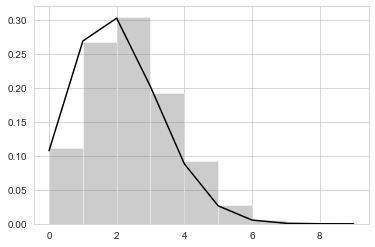

In [4]:
stats.binom.pmf(k=1, n=2, p=0.5) #확률질량함수 - 성공횟수, 시행횟수, 성공확률
stats.binom.cdf(k=10, n=200, p=0.04) #누적
stats.binom.rvs(n=10, p=0.2, size=5) #시행횟수, 성공확률, 생성갯수

# 이항분포 확률변수 히스토그램
binomial = stats.binom(n=10, p=0.2) 
rvs = binomial.rvs(size=10000)
m = np.arange(0, 10, 1) 
pmf = binomial.pmf(k=m) 
sns.distplot(rvs, bins=m, kde=False, norm_hist=True, color='gray')
plt.plot(m, pmf, color='black') 
plt.show()

##### 포아송분포

$$ Pois(x|λ) = {e^{-λ}λ^x \over x!} $$

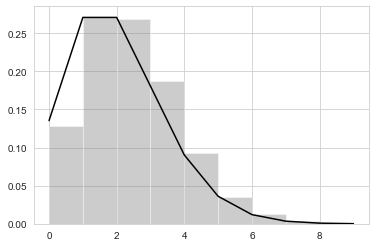

In [5]:
stats.poisson.pmf(k=2, mu=5) #강도 5인 분포에서 2를 얻을 확률
stats.poisson.rvs(mu=2, size=5) #강도 5 포아송 분포에서 5개 수 받음

poisson = stats.poisson(mu = 2) 
rvs = poisson.rvs(size=10000)
m = np.arange(0, 10, 1) 
pmf = poisson.pmf(k=m) 
sns.distplot(rvs, bins=m, kde=False, norm_hist=True, color='gray')
plt.plot(m, pmf, color='black') 
plt.show()

##### 정규분포

In [6]:
stats.norm.interval()

# 중위수검정
stats.median_test(x, y, z)

TypeError: interval() missing 1 required positional argument: 'alpha'

##### t분포

||||||
|-|-|-|-|-|
|일표본 검정|||||
|① 정규성 검정|||||
|stats.shapiro(x)|-Yes→|② stats.ttest_1samp(x, μ)|||
|H0:정규성 가짐|-No→|② stats.wilcoxon(x-μ)|||
|대응표본 검정|(쌍표본)||||
|stats.shapiro(x)|-Yes→|② stats.ttest_rel(x1, x2)|||
|H0:정규성 가짐|-No→|② stats.wilcoxon(x1, x2)|||
|독립표본 검정|||||
|stats.shapiro(x)|||||
|H0:정규성 가짐|-No→|② stats.wilcoxon(x1, x2)|||
||-Yes→|등분산 검정||||
|||② stats.levene(x, y)|-Yes→|③ stats.ttest_ind(x, 1, equal_var=True)|
|||H0: 등분산임|-No→|③ stats.ttest_ind(x, 1, equal_var=False)|

In [ ]:
# t분포
stats.t.interval(0.9, loc=x.mean(), scale=x.std()/np.sqrt(x.shape[0]-1), df=x.shape[0]-1)
stats.ttest_1samp(x, 200, alternative='less') # >: less, <: greater, ≠: alternative

x = np.array(stats.t(df=50, loc=453, scale=80).rvs(50))
y = np.array(stats.t(df=100, loc=401, scale=60).rvs(100))
stats.ttest_ind(x, y, equal_var=False) #독립검정, 항상 False로 두고 Welch 검정을 사용해도 무방
stats.ttest_rel(x, y) #쌍검정

##### 카이제곱검정

In [ ]:
table = pd.pivot_table(data, values, aggfunc='sum', index, columns) 
stats.chi2_contingency(table, correction=False) #통계량, p값, 자유도, 기대도수
# H0: 차이없음 H1: 차이있음

In [ ]:
O, p = np.array([18,55,27]), np.array([.25,.5,.25])
n = 100 
E = n * p 
stats.chisquare(O, E) 
# statistic=2.62, pvalue=0.26982005638468687
# H0: fit H1: no-fit

- **독립인** 두 모집단에 대한 신뢰구간 
$$ (\bar X - \bar Y) ± z_{\alpha /2} \sqrt {s_1^2 /n_1 + s_2^2 /n_2}  $$
$$ (\bar X - \bar Y) ± t_{\alpha /2}(n_1 + n_2 -2)s_p \sqrt {1 /n_1 + 1 /n_2}  $$

- 모분산의 신뢰구간
$$ P[{(n-1)S^2 \over \chi^2(n-1, {\alpha \over 2})}< \sigma^2 < {(n-1)S^2 \over \chi^2(n-1, {1 - {\alpha \over 2}})}] = 1 - \alpha $$
> 표본 10개의 분산이 90일 때 신뢰도 95% 모분산의 신뢰구간
> ```python
    9*90/stats.chi2.ppf(0.975, 9)
    9*90/stats.chi2.ppf(0.025, 9)
> ```



- 표본크기 결정
  - 오차가 `d`이하로 될 확률이 최소 `100(1-α)%`인 `n`
$$ n ≥ (z_{\alpha/2} {\sigma \over d})^2$$
$$ n ≥ (t_{\alpha/2}(n-1) {\sigma \over d})^2$$
  - `p`값이 주어졌을 때(`p`가 없으면 `default=1/2`)
$$ n ≥ p(1-p)({z_{\alpha/2} \over d})^2$$


> 철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 신뢰도 95% 상에서 적절한 표본의 크기 중 최소값은 얼마인가?
> ```python 
   d = 0.05
   a = 0.05
   z = stats.norm.ppf(1-a/2) #1.96
   p = 0.9
   n = p * (1-p) * (z/d)**2 #138.29251754498844
> ```
> 답: 139

> 시제품의 농도가 60%라고 주장할때 유의수준 5%에서 유효 샘플의 수를 계산하라(오차한계 `5`, 표준편차 `17.4`, 샘플 수 `10`).
> ```python 
d = 5
s = 17.4
a = 0.05
t = stats.t.ppf(0.05, df=9) #1.96
(t*s/d)**2  #40.6946137401
> ```
>답: 41

#### 분산분석


|||두개 이상의 다수 집단 간 평균 비교||H0: 차이없다. H1: 차이있다.|
|:-:|-|-|-|:-|
|일원배치 분산분석|||||
|① 정규성 검정|||||
|stats.shapiro(x)|-No→|② stats.kruksal(x, y, z)|||
|H0:정규성 가짐|-Yes→|등분산 검정||||
|||② stats.levene(x, y, z)|-Yes→|③ stats.f_oneway(x, y, z)|
|||H0: 등분산임|-No→|③ welch_anova|
|이원배치 분산분석||하나의 종속변수(연속형), 두개의 독립변수(범주형)|||
|||① model = smf.ols('y~x', data).fit()|||
|||② anova = sm.stats.anova_lm(model, typ=2)|||


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols('y~x', data).fit()
model.summary() #F-statistic: F비, Prob(F): p-value, 낮을수록 신뢰성 높

anova = sm.stats.anova_lm(model, typ=2) #분석분산표, type 2 anova: 독립변수 순서에 영향없음
                                        #           type 3 anova: 제곱 상호작용
anova.params #계수
anova.fittedvalues #계수 적용값 
anova.resid #잔차(적용값-실제값)


#### 베이즈 정리

$$ P(A|B) = {P(B|A)P(A) \over {P(B|A)P(A) + P(B|A^c)P(A^c)}}$$

#### 시계열
 - 정상성 확인
 - decompose 진행

In [ ]:
#결측치 처리
df.value = df.value.interpolate(method='polynomial', order=2) #order=degree
                                                              #method 'time'
df.value = df.value.fillna(method='bfill') #ffill

#날짜 데이터 삽입 
df['date'] = pd.date_range('1990-01', '2014-12', freq='MS') # MS,

df.diff(1) #차분

# 성분 확인
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data, model='additive').plot() #multiplicative

# 정상성 확인
from statsmodels.tsa.stattools import adfuller 
adfuller(data, regression='ct') #nc, c, ct, ctt
#ADF statistic, p-value
#H0: 정상성stationary 갖지 않음. H1: 정상성stationary 가짐.
#H1 이면 차분diff 진행

# ACF, PACF 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data) # AR(p)의 값 확인
plot_pacf(data) # MA(q) 값 확인24w

# ARIMA
from statsmodels.tsa.arima.model import ARIMA 
model = ARIMA(data, order=(2, 1, 2), trend='ct') #(p, d, q)
result = model.fit()
result.summary()
model.forecast(steps=len(test), alpha=0.05) 
model.predict(n_periods=len(test))

# ARIMA search
from pmdarima import auto_arima

best_model = auto_arima(data, 
                        start_p=0, max_p=3,
                        d=1,
                        start_q=0, max_q=3,
                        start_P=0, max_P=3,
                        m=12,
                        start_Q=0, max_Q=3,
                        seasonal=True, 
                        information_criterion='aic',
                        trace=True)

plt.plot(training)
plt.plot(predict)

#### 통계모델

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#다중공선성 확인

#선형모델
model = smf.ols(formula='y~x', data=df).fit()
model.summary() 

#로지스틱모델
model = smf.glm(formula='y~x', data=df, family= sm.failies.Binomial()).fit() 
        # family- 확률분포 지정(Default Binomial(), Poisson(), default Logit)
model.summary()
model.predict(pd.DataFrame({'hours': np.arange(0, 10, 1)}))
model.resid_pearson # 피어슨 잔차
model.pearson_chi2 #피어슨 카이제곱통계량
model.resid_deviance # deviance 잔차, 낮을수록 좋은 모델



model = sklearn.linear_model.LinearRegression().fit(X, y) #Linear Regression 2
model = sklearn.linear_model.LogisticRegression().fit(X, y) #Logistic Regression 2
model = sm.Logit.from_formula('y~x', data=df).fit() # Logistic Regression 3

In [ ]:
def stepwise_backward(df, dependant):

  cols = df.columns.drop([dependant])
  model = sm.Logit.from_formula(dependant + ' ~ ' + '+'.join(cols), df).fit() 
  aic = model.aic    
  print(model.summary())
  print('aic:', aic)

  best_aic = sys.maxsize
  i = 0
  while aic < best_aic:
    i += 1
    best_model = model
    best_aic = aic

    largest_pvalue_factor = sorted(dict(model.pvalues).items(), 
                                   key=lambda item: item[1], reverse=True)[0]
    cols = cols.drop(largest_pvalue_factor[0])

    model = sm.Logit.from_formula(dependant + ' ~ ' + '+'.join(cols), df).fit() 
    aic = model.aic    
    print('STEP:', i, ' - ', largest_pvalue_factor)
    print(model.summary())
    print('aic:', aic)
    print('best_aic:', best_aic)

  return best_model

In [ ]:
# 정규화
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
model = LinearRegression().fit(X, y) 
model = Ridge(alpha=0.5, fit_intercept=False).fit(X, y) #Lasso, ElasticNet. a클수록 정규화 강해짐

# 최적 α
from sklearn.linear_model import RidgeCV, lasso_path, LassoCV
best_ridge = RidgeCV(cv=10, alphas=np.logspace(-2, 0.7, 50), fit_intercept=False).fit(X, y)
best_ridge.alpha_ #최적 α값

lasso_alphas, lasso_coefs, _ = lasso_path(X, y, fit_intercept=False) 
best_lasso = LassoCV(cv=10, alphas=lasso_alphas, fit_intercept=False).fit(X, y) 
best_lasso.alpha_ #최적 α값

In [ ]:
# MLP 예시
from sklearn import datasets 
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

iris = datasets.load_iris()
X = iris.data[50:150, 0:2] 
y = iris.target[50:150]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234) #stratify = y

scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes = (100, 100), 
                      alpha = 0.07, 
                      max_iter = 10000,
                      random_state = 1234)
model.fit(X_train_scaled, y_train)

model.score(X_test_scaled, y_test) 

0.6666666666666666

##### Decision Tree, 앙상블

In [ ]:
# ***의사결정트리 시각화용 함수

import io 
import pydot 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.core.display import Image 
from sklearn.tree import export_graphviz 


def draw_decision_tree(model, features):
  dot_buf = io.StringIO() 
  export_graphviz(model, out_file=dot_buf, feature_names=features)
  graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
  image = graph.create_png() 
  return Image(image) 

def plot_decision_regions(X, y, model, features, title):
  resolution = 0.01 
  markers = ('s', '^', 'o') 
  colors = ('red', 'blue', 'lightgreen')
  cmap = mpl.colors.ListedColormap(colors) 

  x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1 
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

  plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
  plt.xlim(xx1.min(), xx1.max()) 
  plt.ylim(xx2.min(), xx2.max()) 

  for idx, cl in enumerate(np.unique(y)): 
    plt.scatter(x=X[y == cl, 0], y=X[y ==cl, 1], alpha=0.8, c=[cmap(idx)], 
                                            marker=markers[idx], s=80, label=cl)

  plt.xlabel(features[0])
  plt.ylabel(features[1])
  plt.legend(loc='best')
  plt.title(title) 

  return Z

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# DT
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15)
model.fit(X_train, y_train)
draw_decision_tree(model, X_train.columns)

bag = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=15)
bag.fit(X_train, y_train)

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=80)
ada.fit(X_train, y_train)

# RF
rf = RandomForestClassifier(max_depth=5, n_estimators=50).fit(X_train, y_train)

df = pd.DataFrame()
df['colname'] = X_train.columns
df['importances'] = rf.feature_importances_

df = df.sort_values(by=['importances'], ascending=False)
df = df.reset_index(drop=True)
df

#### 전처리

##### EDA 순서

In [ ]:
df.head()
df.info()
df.describe()
sns.distplot(df.x) #히스토그램 확인
stats.shapiro(df.x) #정규성 확인. H0: 정규성을 띈다.

corr = df.corr(method='pearson') #spearman 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='RdBu_r', annot=True, linewidth=3)

plt.bar(df.x.values_counts().index, df.x.values_counts().values) #범주형 시각화

sns.catplot(data=df, x='x', y='y') #범주형 시각화

##### 결측치 처리

In [ ]:
df.value = df.value.interpolate(method='polynomial', order=2)
df.value = df.value.fillna(method='bfill') #ffill
df.dropna(inplace=True)
df.x.fillna(df.x.mean(), inplace=True) #median, 

missingno.matrix(df)

from sklearn.impute import KNNImputer 
KNN_df = df[['col1', 'col2']]
imputer = KNNImputer() 
df_filled = imputer.fit_transform(KNN_df) 
df_filled = pd.DataFrame(df_filled, columns=KNN_df.columns) 
df[KNN_df.columns] = df_filled 
df.isna().sum() #결측치 확인

In [ ]:
# using pd boxplot
_, bp = pd.DataFrame.boxplot(df['x'], return_type = 'both')

outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]] 
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

##### 이상치 처리

In [ ]:
for col in df.columns:
  q1 = df2[col].quantile(0.25) 
  q3 = df2[col].quantile(0.75) 
  iqr = q3 - q1
  df2 = df2.query(col + '>' + str(q1 - 1.5*iqr) + ' and ' + col + '< ' + str(q3 + 1.5*iqr))

##### ohe

In [ ]:
pd.get_dummies(df, columns=['sex', 'guardian'], drop_first=True, dtype=int)

##### 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234) #stratify = y

##### 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler() #MinMaxScaler
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#2
from sklearn.preprocessing import scale 
scale(X_train)

##### 오버샘플링

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

X_over, y_over = RandomOverSampler(random_state=1234).fit_resample(X, y)
plt.scatter(X_over.x, y_over, s=0.03)

X_smote, y_smote = SMOTE(random_state=1234).fit_resample(X, y)
plt.scatter(X_smote.date, y_smote, s=0.03)

#### 모델측정, 모델평가

##### K-Fold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score 
accuracy = cross_val_score(rf, X_test, y_test, scoring='accuracy', 
                           cv=KFold(5, shuffle=True, random_state=12100439)) 
accuracy.mean(), accuracy.std()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score # Regression 
from sklearn.metrics import classification_report, roc_auc_score # Classification
from sklearn.metrics import confusion_matrix # Classification
#      Pred 1   0
# Actual 1[46,  4] 
#        0[ 2, 48]

r2_score(test_y, pred_y) 
mean_squared_error(test_y, pred_y, squared=False) #RMSE
classification_report(test_y, pred)

|Name| API|
|:----|----|
|Area Under the Receiver Operating Characteristic Curve (ROC AUC) | roc_auc_score(y_true, y_score[, …])|
|Receiver operating characteristic (ROC) | roc_curve(y_true, y_score[, …])|
|Average precision (AP) | average_precision_score(y_true, y_score)|
|Precision-recall pairs | precision_recall_curve(y_true, …)|
|Precision, recall, F-measure and support | precision_recall_fscore_support(…)|
|F1 Score | f1_score(y_true, y_pred[, labels, …])|
|F-beta Score | fbeta_score(y_true, y_pred, beta[, …])|
|Precision | precision_score(y_true, y_pred[, …]|
|Recall | recall_score(y_true, y_pred[, …])|
|Main classification metrics | classification_report(y_true, y_pred)|
|confusion matrix | confusion_matrix(y_true, y_pred[, …])|
|Accuracy classification score | accuracy_score(y_true, y_pred)|
|Zero-one classification loss | zero_one_loss(y_true, y_pred[, …])|
|Average Hamming loss | hamming_loss(y_true, y_pred[, …])|
|Brier score | brier_score_loss(y_true, y_prob[, …])|
|Cohen’s kappa | cohen_kappa_score(y1, y2[, labels, …])|
|Average hinge loss | hinge_loss(y_true, pred_decision[, …])|
|Jaccard similarity coefficient | jaccard_similarity_score(y_true, y_pred)|
|Log loss, aka logistic loss or cross-entropy loss | log_loss(y_true, y_pred[, eps, …])|
|Matthews correlation coefficient (MCC) | matthews_corrcoef(y_true, y_pred[, …])|

In [ ]:
from sklearn.metrics import roc_curve, auc 

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))

plt.figure(figsize=(12, 8))
plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC Curve')
plt.show()

auc(fpr1, tpr1), auc(fpr2, tpr2)

#### 그래프

In [ ]:
# qqplot
statsmodels.api.qqplot(x, line='s') # 선상에위치하면 정규분포를 따름

# boxplot
sns.boxplot(x, y, data, color='gray') 

# 히스토그램
sns.distplot(x, bins=10, color='black')
df.hist(bins=10)

# 산포도
sns.jointplot(x, y, joint_kws={"color":"black"}, marginal)kws={'color':'black'}

# 독립변수 간 상관관계 확인(x 여러개일때)
sns.pairplot(data, hue, palette='gray')

# 막대그래프
sns.barplot(x, y, data, pallette='gray_r') 

# 막대그래프2 - multiple bar
df = df.melt(id_vars='class', var_name='factor', value_name='values')
sns.factorplot(x='class', y='values', hue='factor', data=df, kind='bar')

#산점도 + 선형 회귀직선
sns.regplot(x=df.x, y=df.y, data=df)

# 로지스틱 회귀곡선 
sns.lmplot(x, y, data, logistic=True, scatter_kws={'color': 'black'}, line_kws={'color': 'black'},
           x_jitter = 0.1, y_jitter = 0.02) #산포도 흩어지게 하는 설정


In [ ]:
plt.subplot(121)
plt.xlabel('X Label')
plt.title('Title')
plt.legend(loc='upper left')
plt.xticks(range(0, 9), labels=['M'+str(x) for x in range(1, 10)])

#### 군집분석

In [ ]:
from sklearn.cluster import KMeans 
def elbow(df): #elbow score
  sse = [] 
  for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=1234) 
    model.fit(df2[['F', 'M']])
    sse.append(model.inertia_)
  
  plt.plot(range(1, 11), sse, marker='o') 

from sklearn.metrics import calinski_harabasz_score 
calinski_harabasz_score(df, model.labels_)

from sklearn.metrics import silhouette_samples, silhouette_score 
df2['coef'] = silhouette_samples(df, df.cluster)
silhouette_score(df, df.cluster)



#### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(df)
score = pca.transform(df)
pca.components_
ratio = pca.explained_variance_ratio_
ratio
ax = plt.plot(['PC1','PC2','PC3','PC4'], ratio)
plt.show()



#### Pandas

In [ ]:
#읽을 때 인덱스 지정
df = read_csv('data.csv', index_col=0)

#type 변환
pd['x'].astype('int')

#datetime 컬럼 지정
df['date'] = pd.to_datetime(df['date']) #datetime 만들기

#시간단위 재조정
df.resample('M').last() # A

#이동평균
df.rolling(3)

#누적합
df.groupby(by=['location', 'date']).sum().groupby(level=0).cumsum() #누적합

#concat, merge
pd.concat([x, y], axis=0) #0행 1열
pd.merge(x, y, on='id', how='inner') #outer left right 


#pivot, melt
melt = pd.melt(pivot, id_vars=['Month', 'Day'])
melt.pivot(columns='variable', index=['Month', 'Day'], values='value')


air_df.loc[air_df['Month'].isin([12, 1, 2]), 'Season'] = 'winter'

#인덱스 지정, 인덱스 재지정
df.set_index('class', drop=True, append=False, inplace=True)
df.reset_index(drop=False, inplace=False) 

# 조합, 순열
# list(itertools.combinations([1, 2, 3, 4, 5], 3))
# list(itertools.permutations([1, 2, 3, 4, 5], 3))

##### select condition 

In [ ]:
# select

score_df['grade'] = np.select(
    condlist = [
      score_df['score'].between(90, 100, inclusive=True),
      score_df['score'].between(80, 89, inclusive=True),
      score_df['score'].between(70, 79, inclusive=True),
      score_df['score'].between(60, 69, inclusive=True),
      score_df['score'].between(0, 59, inclusive=True)],
    choicelist = ['수', '우', '미', '양', '가'])

# cut 
cars_df['Pr_level'] = pd.cut(cars_df['Price'], bins=[-np.inf, 12, 23, np.inf], 
                             labels=['low', 'middle', 'high'])

##### pivot table 

In [ ]:
air_df = sm.datasets.get_rdataset("airquality").data
pd.pivot_table(air_df, index='Month', values='Temp', aggfunc='mean')

##### aggs

In [ ]:
bb_df = sm.datasets.get_rdataset(package="plyr", dataname="baseball").data
bb_df_avgG = pd.DataFrame(data=bb_df[['id', 'g']].groupby('id').mean())
                                                .rename(columns={'g': 'avgG'})

bb_df3 = pd.merge(bb_df, bb_df_finyear, how='inner', on='id')
                  .sort_values(by=['id', 'year'])

##### query

In [ ]:
cars_df = sm.datasets.get_rdataset("Cars93", package="MASS").data
cars_df.query("Manufacturer in ('Audi', 'BMW') and EngineSize >= 2.4")
cars_df.query("Manufacturer in ('Chevrolet', 'Volkswagen') and Price > 10")

----
----

In [ ]:
mi_reg = pd.Series(mutual_info_regression(X_all, y), 
                   index=X_all.columns).sort_values(ascending=False)